In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Projeye kütüphaneleri yüklemek ile başlıyoruz.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import struct
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from PIL import Image
from tensorflow.keras.utils import to_categorical

**Veri Önişleme**
Veri kümesindeki .png dosyalarının dosya yollarını (path) ve etiketlerini (label) çıkarıp, bunları Pandas kullanarak bir DataFrame'e yerleştiririz. Bu işlemle her görüntü dosyasının yolu ve sınıfı tablo halinde organize edilir. Örneğin:

Path: Dosya yolu (.png uzantılı)
Label: Görüntünün sınıf etiketi
Böylece, görüntülerin yolları ve etiketleri tek bir DataFrame'de saklanır ve analiz için hazır hale getirilir.

In [15]:
dir = '../input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'
label = []
path = []
for dirname, _,filenames in os.walk(dir):
    for filename in filenames:
        if os.path.splitext(filename)[1]=='.png':
            if dirname.split()[-1]!='GT': #GT klasörlerini çıkartalım         
                label.append(os.path.split(dirname)[1])
                path.append(os.path.join(dirname,filename))

df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

Verileri inceliyoruz.

In [16]:
df.head()

,path,label
0,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
1,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
2,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
3,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel
4,../input/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel


In [17]:
df.tail()

,path,label
8995,../input/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream
8996,../input/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream
8997,../input/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream
8998,../input/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream
8999,../input/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream


In [18]:
df.shape

(9000, 2)

In [19]:
print(df)

                                                   path            label
0     ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel
1     ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel
2     ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel
3     ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel
4     ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel
...                                                 ...              ...
8995  ../input/a-large-scale-fish-dataset/Fish_Datas...    Red Sea Bream
8996  ../input/a-large-scale-fish-dataset/Fish_Datas...    Red Sea Bream
8997  ../input/a-large-scale-fish-dataset/Fish_Datas...    Red Sea Bream
8998  ../input/a-large-scale-fish-dataset/Fish_Datas...    Red Sea Bream
8999  ../input/a-large-scale-fish-dataset/Fish_Datas...    Red Sea Bream

[9000 rows x 2 columns]


Burada  veri kümesinde (DataFrame'de) bulunan benzersiz etiketlere (label sütununa) göre rastgele seçilen görüntüleri çiziyoruz.

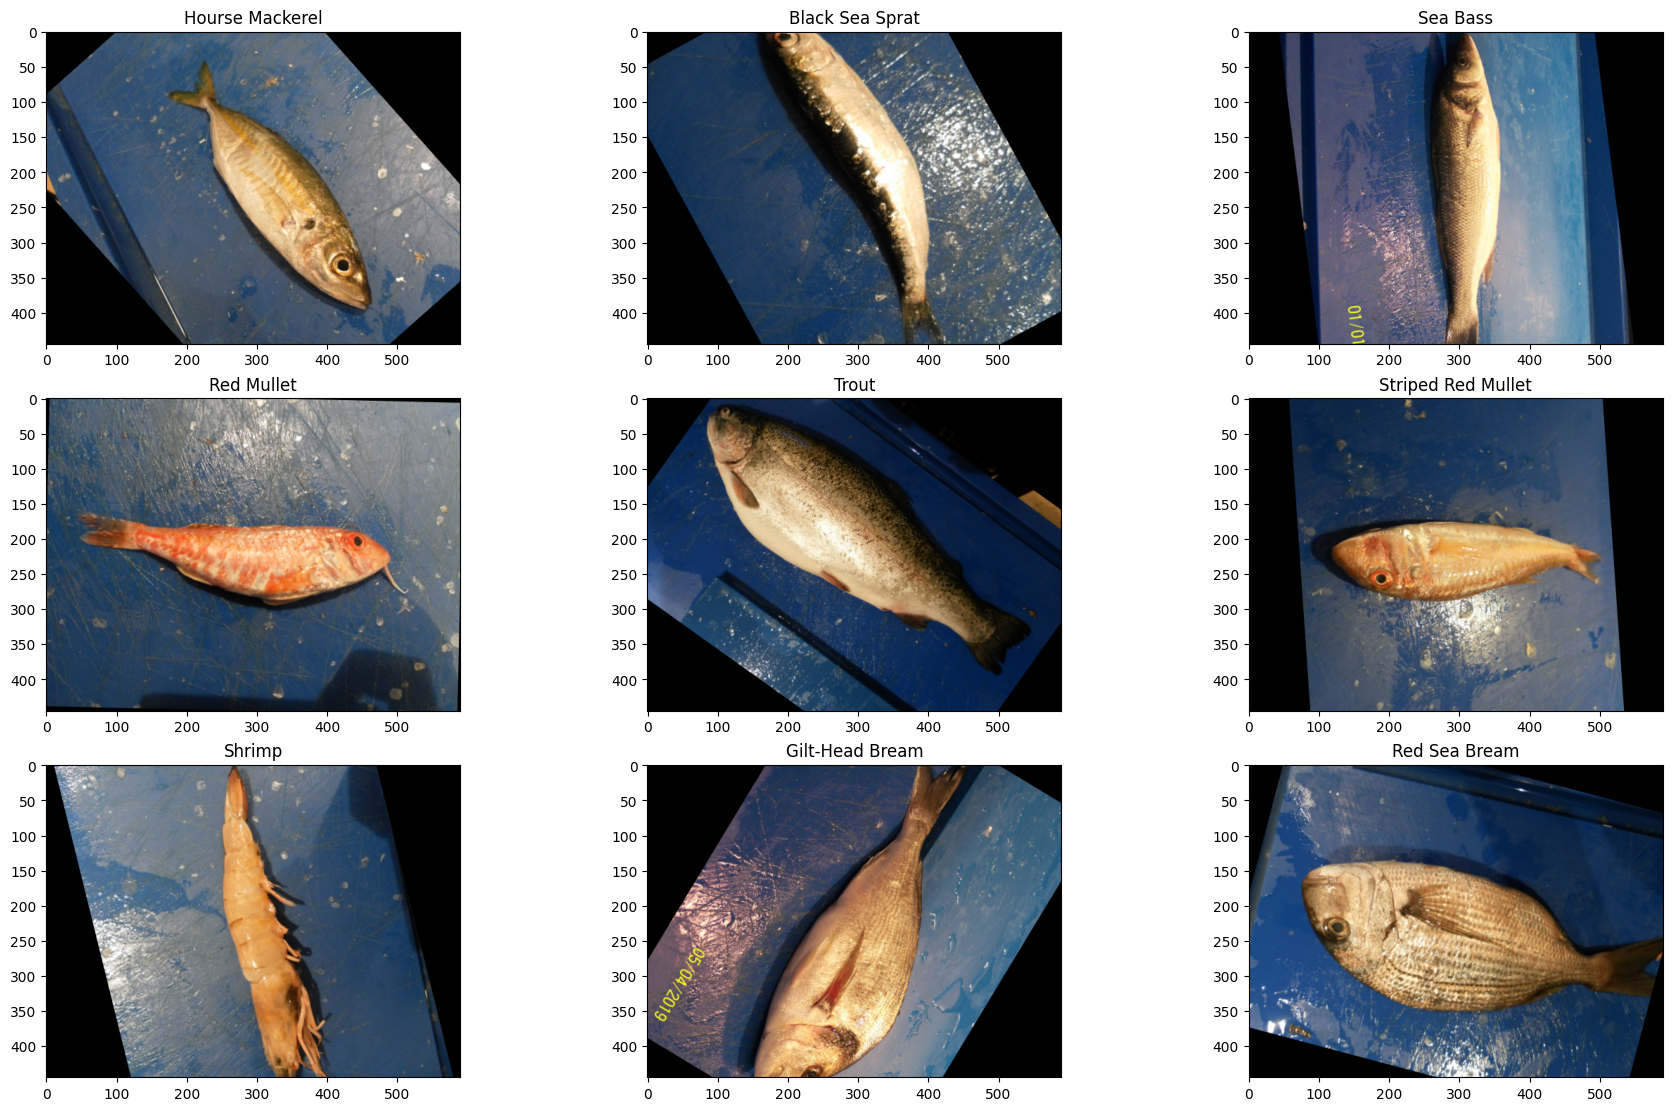

In [20]:
df['label'].unique()
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(18,11), constrained_layout=True)
ax=ax.flatten()
j=0
for i in df['label'].unique():
    
    ax[j].imshow(plt.imread(df[df['label']==i].iloc[0,0]))
    ax[j].set_title(i)
    j=j+1

**Train Test Split**

In [21]:
# Görselleri yükleme ve işleme Function
def load_images(df, img_size=(64, 64)):
    images = []
    labels = []
    for index, row in df.iterrows():
        img = Image.open(row['path']).resize(img_size)  # Resimleri yeniden boyutlandır
        img = np.array(img) / 255.0  # Normalizasyon
        images.append(img)
        labels.append(row['label'])
    return np.array(images), np.array(labels)

In [24]:
# Eğitim ve test setlerini ayırma
X_train_df, X_test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])
print(X_train_df)
print(X_test_df)

                                                   path            label
904   ../input/a-large-scale-fish-dataset/Fish_Datas...  Hourse Mackerel
7510  ../input/a-large-scale-fish-dataset/Fish_Datas...  Gilt-Head Bream
8730  ../input/a-large-scale-fish-dataset/Fish_Datas...    Red Sea Bream
4340  ../input/a-large-scale-fish-dataset/Fish_Datas...            Trout
3241  ../input/a-large-scale-fish-dataset/Fish_Datas...       Red Mullet
...                                                 ...              ...
8418  ../input/a-large-scale-fish-dataset/Fish_Datas...    Red Sea Bream
4900  ../input/a-large-scale-fish-dataset/Fish_Datas...            Trout
6144  ../input/a-large-scale-fish-dataset/Fish_Datas...           Shrimp
6422  ../input/a-large-scale-fish-dataset/Fish_Datas...           Shrimp
6089  ../input/a-large-scale-fish-dataset/Fish_Datas...           Shrimp

[7200 rows x 2 columns]
                                                   path            label
8361  ../input/a-large-sca

Burası eğitim ve test veri setlerini yükleyip etiketleri işlemeye yönelik adımları içerir. 

In [25]:
# Görsellerin yüklenmesi
X_train, y_train = load_images(X_train_df)
X_test, y_test = load_images(X_test_df)

# Etiketleri one-hot encoding'e dönüştürme
classes = df['label'].unique()
class_map = {label: idx for idx, label in enumerate(classes)}
y_train = np.array([class_map[label] for label in y_train])
y_test = np.array([class_map[label] for label in y_test])

y_train = to_categorical(y_train, num_classes=len(classes))
y_test = to_categorical(y_test, num_classes=len(classes))

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (7200, 64, 64, 3), y_train shape: (7200, 9)
X_test shape: (1800, 64, 64, 3), y_test shape: (1800, 9)


**ANN MODELİ**

In [26]:
# ANN modeli yaratma
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

# Modeli derleme
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# Modeli eğitme
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.2765 - loss: 2.2856 - val_accuracy: 0.4840 - val_loss: 1.5150
Epoch 2/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5489 - loss: 1.3019 - val_accuracy: 0.6097 - val_loss: 1.1261
Epoch 3/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6571 - loss: 0.9835 - val_accuracy: 0.6667 - val_loss: 0.9945
Epoch 4/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.7475 - loss: 0.7699 - val_accuracy: 0.7396 - val_loss: 0.7463
Epoch 5/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.7848 - loss: 0.6326 - val_accuracy: 0.8062 - val_loss: 0.5837
Epoch 6/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8359 - loss: 0.5077 - val_accuracy: 0.8035 - val_loss: 0.5303
Epoch 7/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.8303 - loss: 0.4834 - val_accuracy: 0.7937 - val_loss: 0.6137
Epoch 8/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8575 - loss: 0.4129 - val_accu

In [28]:
# Test seti üzerinde değerlendirme aşaması
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8924 - loss: 0.3491
Test accuracy: 0.8933333158493042


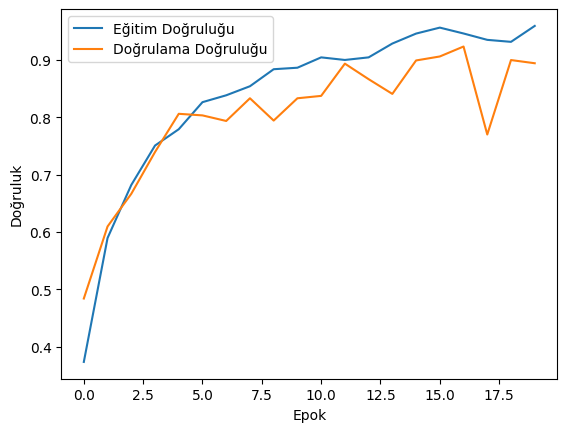

In [29]:
# Eğitim aşamalarını görselleşirme
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epok')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()